## Statistical Concensus Analysis of SLAM data

In [204]:
import pandas as pd
import json as js
import matplotlib.pyplot as plt
import numpy as np
import math as m
import seaborn as sns
import scipy

In [205]:
file_path = '/home/jayanaka-98/slam/notebooks/Statistical Analysis/all_task_completed_B.json'
with open(file_path, 'r') as file:
    data = js.load(file)

new_dict = {}
for worker in data:
    new_dict.update(worker)

data = new_dict

In [206]:
workers = list(data.keys())
all_models= ['stablelm-zephyr_3b',
             'orca2_7b',
             'llama2_7b-chat',
             'openchat_7b-v3.5', 
             'neural-chat_7b',
             'mistral_7b-instruct',
             'gpt-4','starling-lm_7b',
             'vicuna_7b',
             'zephyr_7b-beta',
             'orca-mini_3b']

In [207]:
Play_count = {}

for worker in workers:
    Play_count[worker] = {}
    for model in all_models:
        Play_count[worker].update({model:0})

Win_count = {}

for worker in workers:
    Win_count[worker] = {}
    for model in all_models:
        Win_count[worker].update({model:0})


In [208]:
for worker in workers:
    for response in data[worker]:
        Play_count[worker][response['model1']] += 1
        Play_count[worker][response['model2']] += 1

df = (pd.DataFrame(Play_count)).T


In [209]:
for worker in workers:
    for response in data[worker]:
        if response['prefer'] == 'About the same':
            Win_count[worker][response['model1']] +=1
            Win_count[worker][response['model2']] +=1
        elif response['prefer'] == '1':
            Win_count[worker][response['model1']] +=1
        elif response['prefer'] == '2':
            Win_count[worker][response['model2']] +=1

df3 = (pd.DataFrame(Win_count)).T

In [210]:
def subsample(n,df):
    sorted = df.sort_values(by=all_models)
    memberNO = len(df)//n
    group_keys =[]
    k = []
    for i in range(len(df)):
        if i % memberNO != 0 or i==0:
            if i == 0 :
                k.append(workers[i])
            elif i % 2 == 0 :
                k.append(workers[(i)//2])
            else :
                k.append(workers[len(df)-(i+1)//2])
        else:
            group_keys.append(k)
            k = []

    return group_keys

sub_keys = subsample(10,df)

In [211]:
sub_data = pd.DataFrame([])

for sample in sub_keys:
    sub = df3.loc[sample]
    sub_data[sample[0]+' - '+sample[-1]] = pd.DataFrame(sub.sum(axis=0))

sub_num = pd.DataFrame([])

for sample in sub_keys:
    sub = df.loc[sample]
    sub_num[sample[0]+' - '+sample[-1]] = pd.DataFrame(sub.sum(axis=0))

In [212]:
sub_data

,worker_1 - worker_5,worker_6 - worker_91,worker_90 - worker_14,worker_15 - worker_82,worker_81 - worker_24,worker_25 - worker_73,worker_72 - worker_33,worker_34 - worker_63,worker_62 - worker_42,worker_43 - worker_54
stablelm-zephyr_3b,17,16,9,8,8,9,18,19,10,9
orca2_7b,13,14,9,12,11,10,6,9,6,9
llama2_7b-chat,13,13,16,10,13,16,6,18,7,11
openchat_7b-v3.5,15,10,10,13,13,13,12,11,14,11
neural-chat_7b,10,21,7,9,12,12,12,11,16,13
mistral_7b-instruct,15,9,8,13,10,14,11,14,7,12
gpt-4,13,16,13,11,12,14,9,8,16,17
starling-lm_7b,10,11,15,11,13,8,13,10,14,21
vicuna_7b,15,9,13,8,14,13,9,9,8,12
zephyr_7b-beta,11,13,13,15,13,6,19,20,10,9


In [213]:
sub_num

,worker_1 - worker_5,worker_6 - worker_91,worker_90 - worker_14,worker_15 - worker_82,worker_81 - worker_24,worker_25 - worker_73,worker_72 - worker_33,worker_34 - worker_63,worker_62 - worker_42,worker_43 - worker_54
stablelm-zephyr_3b,29,23,18,19,16,20,23,24,17,16
orca2_7b,19,21,17,27,18,22,22,19,16,18
llama2_7b-chat,28,19,23,18,15,24,15,24,10,23
openchat_7b-v3.5,23,17,20,18,24,27,19,19,25,16
neural-chat_7b,18,29,21,19,14,15,19,21,24,23
mistral_7b-instruct,21,20,22,19,18,22,22,16,15,18
gpt-4,19,22,18,21,24,21,15,13,28,24
starling-lm_7b,15,15,20,21,21,15,20,16,22,28
vicuna_7b,25,15,19,20,22,22,16,22,20,19
zephyr_7b-beta,20,20,22,19,21,15,28,30,19,15


In [214]:
i = 1
column_names = sub_data.columns
for sub_smpl in column_names:
    # sub_data[sub_smpl] = sub_data[sub_smpl]/sub_num[sub_smpl]
    sub_data['sub_sample_' + str(i)] = sub_data[sub_smpl].rank(ascending=False)
    i += 1

sub_data = sub_data.drop(column_names, axis=1)
sub_data = sub_data.sort_values(by=list(sub_data.columns))

In [215]:
sub_data

,sub_sample_1,sub_sample_2,sub_sample_3,sub_sample_4,sub_sample_5,sub_sample_6,sub_sample_7,sub_sample_8,sub_sample_9,sub_sample_10
stablelm-zephyr_3b,1.0,2.5,7.5,10.5,11.0,9.0,2.0,2.0,6.5,10.0
openchat_7b-v3.5,3.0,9.0,6.0,2.5,4.5,4.5,5.0,5.5,4.5,7.5
vicuna_7b,3.0,10.5,4.0,10.5,2.0,4.5,8.5,8.5,8.0,5.5
mistral_7b-instruct,3.0,10.5,9.0,2.5,10.0,2.5,7.0,4.0,9.5,5.5
gpt-4,6.0,2.5,4.0,5.5,7.5,2.5,8.5,10.5,2.5,2.5
orca2_7b,6.0,4.0,7.5,4.0,9.0,8.0,10.5,8.5,11.0,10.0
llama2_7b-chat,6.0,5.5,1.0,7.0,4.5,1.0,10.5,3.0,9.5,7.5
zephyr_7b-beta,8.5,5.5,4.0,1.0,4.5,11.0,1.0,1.0,6.5,10.0
orca-mini_3b,8.5,7.0,10.5,8.5,1.0,7.0,5.0,10.5,1.0,2.5
neural-chat_7b,10.5,1.0,10.5,8.5,7.5,6.0,5.0,5.5,2.5,4.0


In [216]:
corr = sub_data.corr(method='spearman')

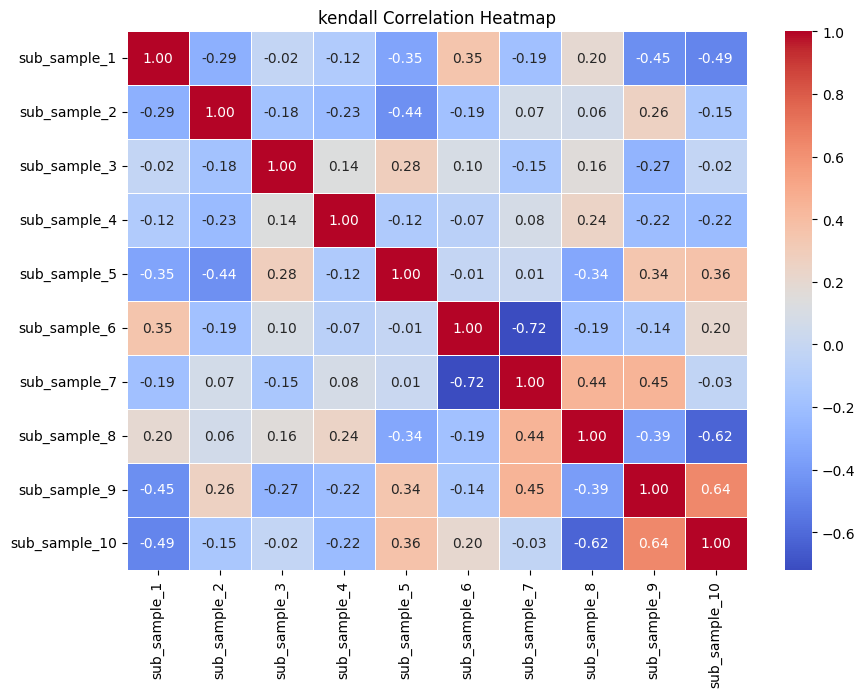

In [217]:
plt.figure(figsize=(10, 7))  # Customize figure size
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Add titles and labels as necessary
plt.title('kendall Correlation Heatmap')
plt.show()

In [218]:
def sub_sample_optimizer(df, MaxVar):
    variance = 0
    n = 2

    for i in range(4,5):
    # while variance < MaxVar :
        sub_keys = subsample(i,df)
        sub_data = pd.DataFrame([])

        for sample in sub_keys:
            sub = df.loc[sample]
            sub_data[sample[0]+' - '+sample[-1]] = pd.DataFrame(sub.sum(axis=0))
        # n += 1
        # variance += 5
        # row_variance = m.sqrt((sub_data.var(axis=1)).var(axis=0))

        # print(row_variance)

        print(sub_data)

sub_sample_optimizer(df,1)


                     worker_1 - worker_88  worker_87 - worker_76   
stablelm-zephyr_3b                     69                     46  \
orca2_7b                               60                     58   
llama2_7b-chat                         69                     55   
openchat_7b-v3.5                       57                     66   
neural-chat_7b                         67                     52   
mistral_7b-instruct                    56                     60   
gpt-4                                  57                     58   
starling-lm_7b                         46                     56   
vicuna_7b                              52                     63   
zephyr_7b-beta                         59                     56   
orca-mini_3b                           56                     50   

                     worker_75 - worker_63  worker_62 - worker_51  
stablelm-zephyr_3b                      71                     46  
orca2_7b                                62     

In [219]:
sub1 = df.loc[sub_keys[0]]
column_sums1 = sub1.sum(axis=0)
sub2 = df.loc[sub_keys[1]]
column_sums2 = sub2.sum(axis=0)